# Ejemplo de convet para clasificación de perros y gatos

El dataset esta disponible en: www.kaggle.com/c/dogs-vs-cats/data

In [ ]:
import os, shutil

In [2]:
os.getcwd()

'/tf/deep_learning_keras'

In [3]:
path = '/tf/deep_learning_keras/data/cats_and_dogs/'

## Data cats

In [4]:
# train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(path + 'origin_dir/train', fname)
    dst = os.path.join(path + 'train_dir/train_cats_dir', fname)
    shutil.copyfile(src, dst)

In [5]:
# validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(path + 'origin_dir/train', fname)
    dst = os.path.join(path + 'validation_dir/validation_cats_dir', fname)
    shutil.copyfile(src, dst)

In [6]:
# test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(path + 'origin_dir/train', fname)
    dst = os.path.join(path + 'test_dir/test_cats_dir', fname)
    shutil.copyfile(src, dst)

## Data dogs

In [7]:
# train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(path + 'origin_dir/train', fname)
    dst = os.path.join(path + 'train_dir/train_dogs_dir', fname)
    shutil.copyfile(src, dst)

In [8]:
# validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(path + 'origin_dir/train', fname)
    dst = os.path.join(path + 'validation_dir/validation_dogs_dir', fname)
    shutil.copyfile(src, dst)

In [9]:
# test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(path + 'origin_dir/train', fname)
    dst = os.path.join(path + 'test_dir/test_dogs_dir', fname)
    shutil.copyfile(src, dst)

In [10]:
# Revion cantidades
print('total training cat images: ', len(os.listdir(path + 'train_dir/train_cats_dir')))
print('total training dog images: ', len(os.listdir(path + 'train_dir/train_dogs_dir')))

print('total validation cat images: ', len(os.listdir(path + 'validation_dir/validation_cats_dir')))
print('total validation dog images: ', len(os.listdir(path + 'validation_dir/validation_dogs_dir')))

print('total test cat images: ', len(os.listdir(path + 'test_dir/test_cats_dir')))
print('total test cat images: ', len(os.listdir(path + 'test_dir/test_cats_dir')))

total training cat images:  1001
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500
total test cat images:  500
total test cat images:  500


## Creacion de instancia de una convets

In [11]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(521, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [13]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [14]:
# Utilizar ImageDataGenerator para leer imagenes del directorio
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
    path + 'train_dir',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2002 images belonging to 2 classes.


In [16]:
# Produce:
# lotes de imagenes RGB de 150 x 150 con forma: (20, 150 150, 3)
# etiquetas binarias con forma: (20,)
validation_generator = test_datagen.flow_from_directory(
    path + 'validation_dir',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
) 

Found 1000 images belonging to 2 classes.


In [17]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('data batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
data batch shape:  (20,)


In [18]:
# Ajuste del modelo utilizando un generador por lotes
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 8s 78ms/step - loss: 0.7005 - accuracy: 0.5298 - val_loss: 0.7004 - val_accuracy: 0.6290
Epoch 2/30
100/100 [==============================] - 5s 50ms/step - loss: 0.6317 - accuracy: 0.6458 - val_loss: 0.5928 - val_accuracy: 0.6690
Epoch 3/30
100/100 [==============================] - 5s 50ms/step - loss: 0.5633 - accuracy: 0.7104 - val_loss: 0.5929 - val_accuracy: 0.6490
Epoch 4/30
100/100 [==============================] - 5s 49ms/step - loss: 0.5215 - accuracy: 0.7316 - val_loss: 0.5213 - val_accuracy: 0.6820
Epoch 5/30
100/100 [==============================] - 5s 49ms/step - loss: 0.4680 - accuracy: 0.7725 - val_loss: 0.4132 - val_accuracy: 0.7040
Epoch 6/30
100/100 [==============================] - 5s 48ms/step - loss: 0.4292 - accuracy: 0.8027 - val_loss: 0.6640 - val_accuracy: 0.7110
Epoch 7/30
100/100 [==============================] - 5s 49ms/step - loss: 0.4082 - accuracy: 0.8163 - val_loss: 0.2823 - val_accuracy: 0.6890

In [19]:
# Guardar el modelo
model.save('models/cats_and_dogs_small_1.keras')

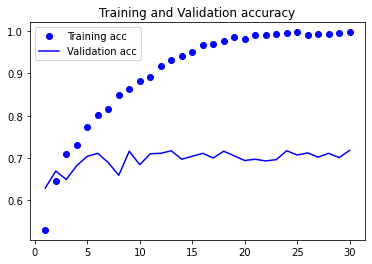

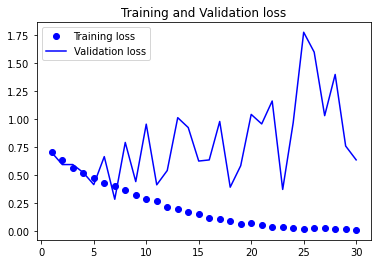

In [20]:
# Plot de curvas de perdida y exactitud durante el entrenamiento
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

# Aumento de datos

In [21]:
# Generar aumento de datos a través de ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

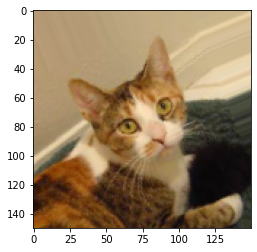

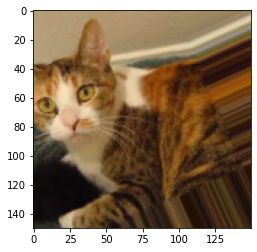

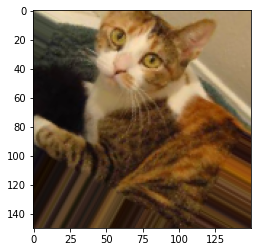

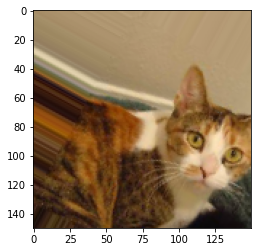

In [27]:
from keras.preprocessing import image

fnames = [os.path.join(path + 'train_dir/train_cats_dir', fname) for fname in os.listdir(path + 'train_dir/train_cats_dir')]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [28]:
# Definir una nueva convet que incluye dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [33]:
# Entrenar modelo utilizando datos aumentados
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    path + 'train_dir',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    path + 'validation_dir',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2002 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 17s 173ms/step - loss: 0.7442 - accuracy: 0.5271 - val_loss: 0.6888 - val_accuracy: 0.6187
Epoch 2/100
100/100 [==============================] - 16s 157ms/step - loss: 0.6731 - accuracy: 0.5895 - val_loss: 0.7167 - val_accuracy: 0.6160
Epoch 3/100
100/100 [==============================] - 15s 153ms/step - loss: 0.6449 - accuracy: 0.6151 - val_loss: 0.5584 - val_accuracy: 0.6542
Epoch 4/100
100/100 [==============================] - 17s 166ms/step - loss: 0.6318 - accuracy: 0.6306 - val_loss: 0.5647 - val_accuracy: 0.6753
Epoch 5/100
100/100 [==============================] - 15s 153ms/step - loss: 0.6122 - accuracy: 0.6636 - val_loss: 0.5849 - val_accuracy: 0.6485
Epoch 6/100
100/100 [==============================] - 17s 172ms/step - loss: 0.6013 - accuracy: 0.6721 - val_loss: 0.8027 - val_accuracy: 0.6869
Epoch 7/100
100/100 [===================

In [34]:
# Guardar modelo
model.save('models/cats_and_dogs_small_2.keras')

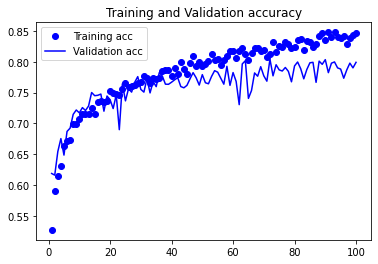

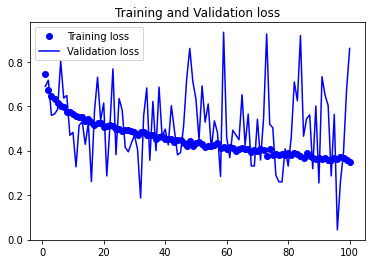

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()